In [35]:
import numpy as np 
import pandas as pd 
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import precision_score, recall_score, confusion_matrix, accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from warnings import filterwarnings
filterwarnings('ignore')

In [36]:
df=pd.read_csv("telco2.csv", sep=",") #load file
df2 = df.copy()
pd.set_option('max_columns',43)
df

,Unnamed: 0,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,OnlineServices,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,0,1,0,1,0,1,29.85,29.85,0,1,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0
1,1,1,0,0,0,34,1,0,56.95,1889.50,0,3,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1
2,2,1,0,0,0,2,1,1,53.85,108.15,1,3,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1
3,3,1,0,0,0,45,0,0,42.30,1840.75,0,3,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,1,0,0,0
4,4,0,0,0,0,2,1,1,70.70,151.65,1,1,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,7038,1,0,1,1,24,1,1,84.80,1990.50,0,7,0,0,1,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,1
7039,7039,0,0,1,1,72,1,1,103.20,7362.90,0,6,0,0,1,0,1,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0
7040,7040,0,0,1,1,11,0,1,29.60,346.45,0,1,0,1,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0
7041,7041,1,1,1,0,4,1,1,74.40,306.60,1,2,0,0,1,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1


In [37]:
df.drop(["Unnamed: 0",], axis =1, inplace = True)
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,OnlineServices,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,1,29.85,29.85,0,1,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0
1,1,0,0,0,34,1,0,56.95,1889.50,0,3,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1
2,1,0,0,0,2,1,1,53.85,108.15,1,3,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1
3,1,0,0,0,45,0,0,42.30,1840.75,0,3,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,1,0,0,0
4,0,0,0,0,2,1,1,70.70,151.65,1,1,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,1,84.80,1990.50,0,7,0,0,1,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,1
7039,0,0,1,1,72,1,1,103.20,7362.90,0,6,0,0,1,0,1,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0
7040,0,0,1,1,11,0,1,29.60,346.45,0,1,0,1,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0
7041,1,1,1,0,4,1,1,74.40,306.60,1,2,0,0,1,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1


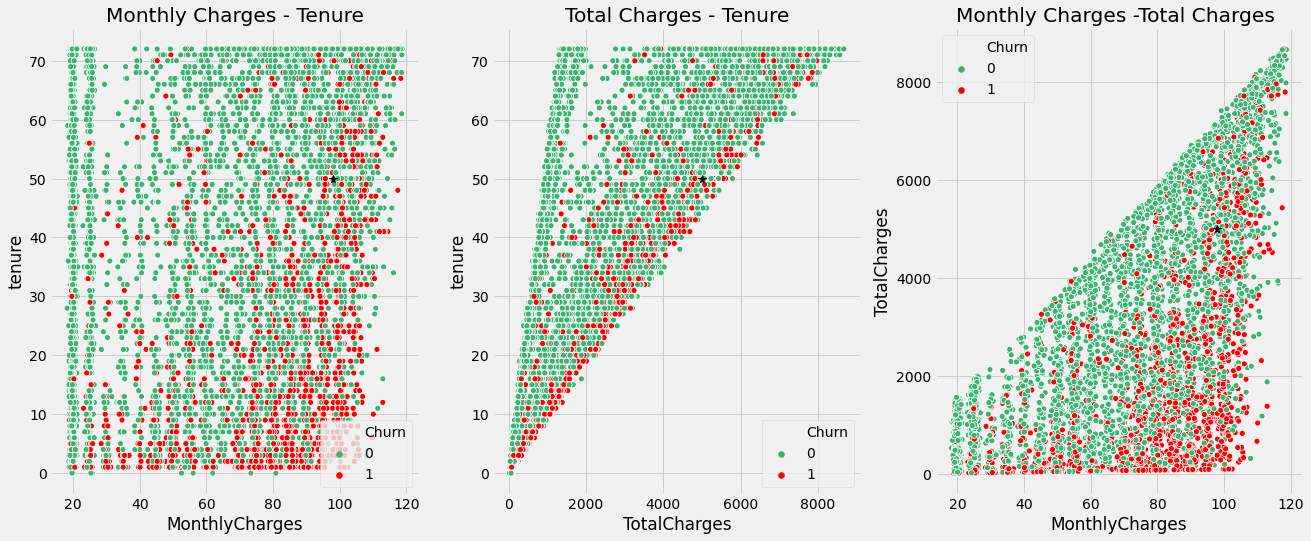

In [38]:
plt.figure(figsize=(20, 8))
plt.subplot(1,3,1)
sns.scatterplot(x="MonthlyCharges", y="tenure",palette=["mediumseagreen","red"], hue="Churn", data=df)
plt.title('Monthly Charges - Tenure')
plt.plot(98,50, color='black', marker='*', markersize=8)

plt.subplot(1,3,2)
sns.scatterplot(x="TotalCharges", y="tenure",palette=["mediumseagreen","red"], hue="Churn", data=df)
plt.title("Total Charges - Tenure")
plt.plot(5000, 50, color='black', marker='*', markersize=8)

plt.subplot(1,3,3)
sns.scatterplot(x="MonthlyCharges", y="TotalCharges",palette=["mediumseagreen","red"], hue="Churn",data=df)
plt.title("Monthly Charges -Total Charges ")
plt.plot(98, 5000, color='black', marker='*', markersize=8)

plt.show()

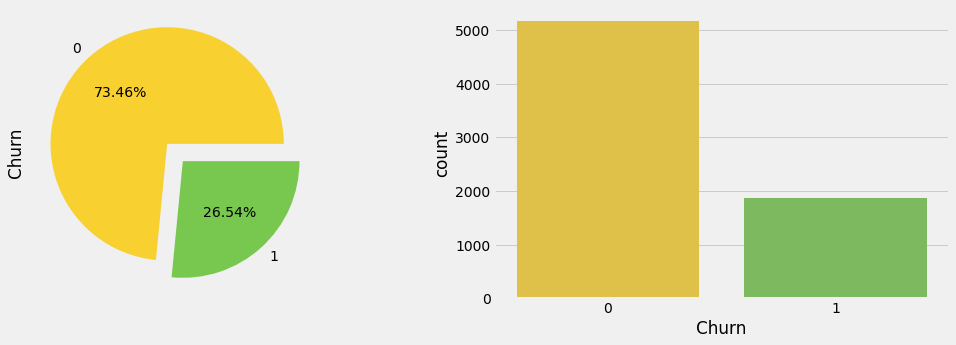

In [39]:
fig,ax=plt.subplots(ncols=2,figsize=(16,5)) #(Yes:1, No:0)
df["Churn"].value_counts().plot.pie(autopct="%.2f%%",colors=['#F8D030','#78C850'],explode = (0.1, 0.1),ax=ax[0])
sns.countplot(df["Churn"],ax=ax[1],palette=['#F8D030','#78C850'])

In [40]:
y = df["Churn"]
X = df.drop(["Churn"], axis = 1)

In [41]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

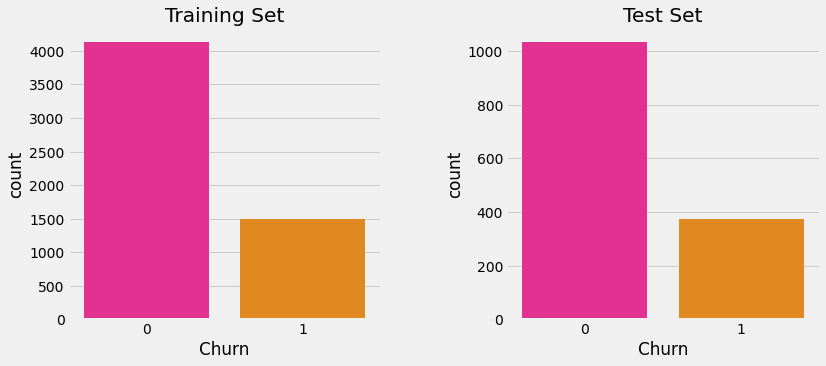

Proportion of '0' in all data     : %73 
Proportion of '0' in training set : %73 
Proportion of '0' in test set     : %74 


In [42]:
plt.figure(figsize=(12,5))
plt.style.use('fivethirtyeight')
plt.subplots_adjust(wspace=0.4)

plt.subplot(121)
sns.countplot(y_train,palette=['deeppink','darkorange'])
plt.title("Training Set")

plt.subplot(122)
sns.countplot(y_test,palette=['deeppink','darkorange'])
plt.title("Test Set")

plt.show()

print("Proportion of '0' in all data     : %{:.0f} ".format(len(y[y==0])/len(y)*100))
print("Proportion of '0' in training set : %{:.0f} ".format(len(y_train[y_train==0])/len(y_train)*100))
print("Proportion of '0' in test set     : %{:.0f} ".format(len(y_test[y_test==0])/len(y_test)*100))

In [43]:
random_forest = RandomForestClassifier(n_estimators=25, random_state=2)
random_forest.fit(X_train, y_train) 

RandomForestClassifier(n_estimators=25, random_state=2)

In [44]:
from sklearn.metrics import confusion_matrix

x_pred = random_forest.predict(X_train)
y_pred = random_forest.predict(X_test)

c_matrix_train = confusion_matrix(y_train, x_pred)
c_matrix_test = confusion_matrix(y_test, y_pred)

print("Confusion matrix (Train data)", "-"*30, c_matrix_train, sep="\n")
print("Confusion matrix (Test data)", "-"*30, c_matrix_test, sep="\n")

Confusion matrix (Train data)
------------------------------
[[4132    6]
 [  20 1476]]
Confusion matrix (Test data)
------------------------------
[[928 108]
 [181 192]]


In [45]:
TN = c_matrix_test[0][0]
TP = c_matrix_test[1][1]
FP = c_matrix_test[0][1]
FN = c_matrix_test[1][0]

print("Doğru negatif sayısı   :", TN)
print("Doğru pozitif sayısı   :", TP)
print("Yanlış pozitif sayısı  :", FP)
print("Yanlış negatif sayısı  :", FN)

Doğru negatif sayısı   : 928
Doğru pozitif sayısı   : 192
Yanlış pozitif sayısı  : 108
Yanlış negatif sayısı  : 181


In [46]:
from sklearn.metrics import accuracy_score
print("Modelin eğitim verisindeki doğruluğu : ",random_forest.score(X_train,y_train))
print("Modelden alınan doğruluk değeri : ",  random_forest.score(X_test, y_test))
print("Hesaplanan doğruluk değeri      : ",  (TN + TP)/(FN + FP + TN + TP))
print("accuracy_score()        : ",  accuracy_score(y_test, y_pred))

Modelin eğitim verisindeki doğruluğu :  0.9953851615193469
Modelden alınan doğruluk değeri :  0.794889992902768
Hesaplanan doğruluk değeri      :  0.794889992902768
accuracy_score()        :  0.794889992902768


In [47]:
test_array = np.array ([[1,0,0,0,50,0,0,98,5000,3,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,1,0,0,0]])
random_forest.predict(test_array)

array([0], dtype=int64)

In [48]:
from sklearn.metrics import f1_score,classification_report, precision_recall_fscore_support

print(classification_report(y_test,y_pred) )

print("f1_score()        : {:.2f}".format(f1_score(y_test, y_pred)))
print("recall_score()     : {:.2f}".format(recall_score(y_test, y_pred,average='macro')))
print("precision_score()  : {:.2f}".format(precision_score(y_test, y_pred,average='macro')))
print('\n')

metrikler =  precision_recall_fscore_support(y_test, y_pred)
print("Hassasiyet :" , metrikler[0]) 
print("Duyarlılık :" , metrikler[1]) 
print("F1 Skoru   :" , metrikler[2])

              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1036
           1       0.64      0.51      0.57       373

    accuracy                           0.79      1409
   macro avg       0.74      0.71      0.72      1409
weighted avg       0.78      0.79      0.79      1409

f1_score()        : 0.57
recall_score()     : 0.71
precision_score()  : 0.74


Hassasiyet : [0.8367899 0.64     ]
Duyarlılık : [0.8957529  0.51474531]
F1 Skoru   : [0.86526807 0.57057949]


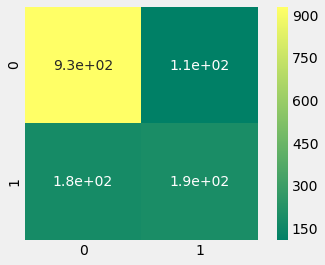

In [49]:
confusion_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(confusion_matrix, square=True, annot=True,  cmap="summer")

In [50]:
test_prediction_proba = random_forest.predict_proba(X_test)[:,1]

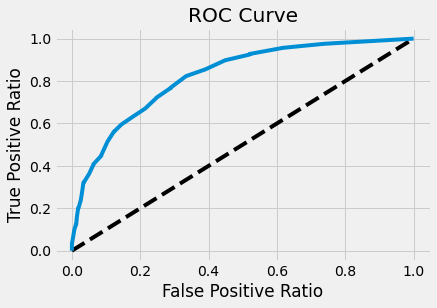

In [51]:
from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, thresholds  = roc_curve(y_test, test_prediction_proba)

import matplotlib.pyplot as plt
# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)

plt.xlabel('False Positive Ratio')
plt.ylabel('True Positive Ratio')
plt.title('ROC Curve')

plt.show()

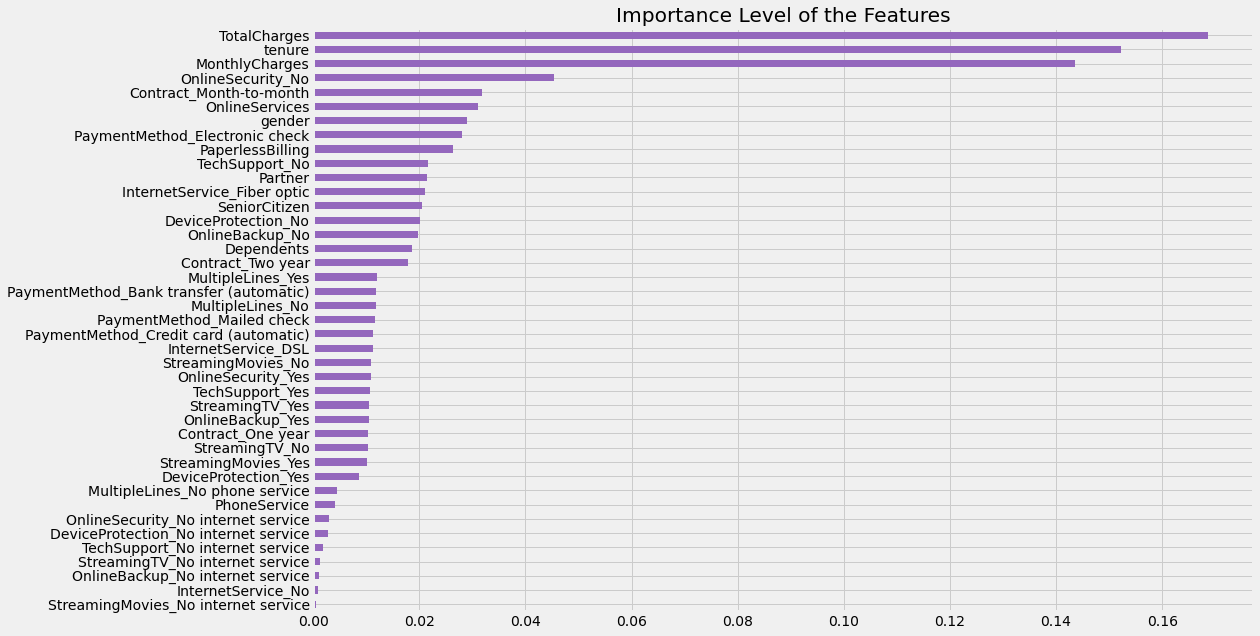

In [52]:
plt.figure(figsize=(15,10))
importance_level = pd.Series(data=random_forest.feature_importances_,
                        index= X_train.columns)

importance_level_sorted = importance_level.sort_values()

importance_level_sorted.plot(kind='barh', color ='#9467bd')
plt.title('Importance Level of the Features')
plt.show()

### Optimization

In [53]:
forest_params={"n_estimators": [10,50,100],
        "criterion": ["gini", "entropy"]}

grids_forest=GridSearchCV(estimator=random_forest,
                     param_grid=forest_params,
                     cv=10)

grids_forest.fit(X_train,y_train)

print("Best Parameters: " + str(grids_forest.best_params_))
print("Best Skor:" + str(grids_forest.best_score_))

Best Parameters: {'criterion': 'gini', 'n_estimators': 100}
Best Skor:0.784162226169331


## 2- With some important attributes

In [54]:
y2 = df2["Churn"]
X2 = df2[['tenure','MonthlyCharges']]

In [55]:
X2_train,X2_test,y2_train,y2_test = train_test_split(X2,y2,test_size=0.2,random_state=42)

In [56]:
random_forest2 = RandomForestClassifier(n_estimators=25, random_state=2)
random_forest2.fit(X2_train, y2_train)

RandomForestClassifier(n_estimators=25, random_state=2)

In [57]:
y2_pred = random_forest2.predict(X2_test)
print("Modelin eğitim verisindeki doğruluğu : ",random_forest2.score(X2_train,y2_train))
print("Modelden alınan doğruluk değeri : ",  random_forest2.score(X2_test, y2_test))
print("accuracy_score()        : ",  accuracy_score(y2_test, y2_pred))

Modelin eğitim verisindeki doğruluğu :  0.9753283635072773
Modelden alınan doğruluk değeri :  0.7494677075940384
accuracy_score()        :  0.7494677075940384


# Best Model 

In [58]:
n_number = np.arange(10,120,10)
train_score = np.empty(len(n_number))
test_score = np.empty(len(n_number))

In [59]:
for i, k in enumerate(n_number):
    random_forest2 = RandomForestClassifier(n_estimators=k)
    random_forest2.fit(X_train, y_train)
    train_score[i] = random_forest2.score(X_train, y_train)

    #Compute accuracy on the testing set
    test_score[i] = random_forest2.score(X_test, y_test)

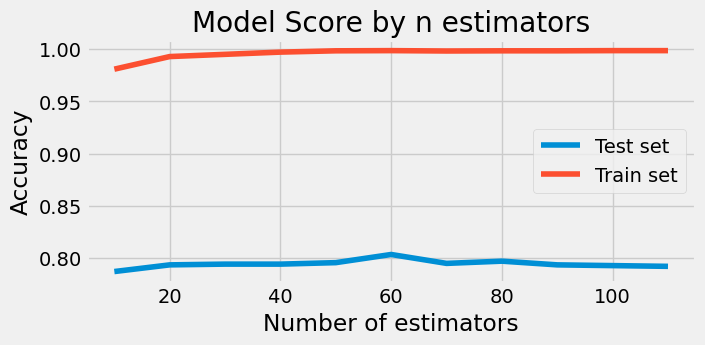

In [60]:
plt.figure(figsize=(7,3), dpi = 100)
plt.plot(n_number,test_score, label = 'Test set')
plt.plot(n_number, train_score, label = 'Train set')
plt.legend()
plt.title('Model Score by n estimators')
plt.xlabel('Number of estimators')
plt.ylabel('Accuracy')
plt.show()

In [61]:
import joblib 
# Save the model as a pickle in a file 
joblib.dump(random_forest, 'forestmodel.pkl') 
random_forest_score = random_forest.score(X_test, y_test)
joblib.dump(random_forest_score, 'forestmodelscore.pkl')  
# Load the model from the file 
#forest_from_joblib = joblib.load('forestmodel.pkl')  
#forest_from_score_joblib = joblib.load('forestmodelscore.pkl')  

['forestmodelscore.pkl']